# **🧪 Laboratório # 6**

### ASSUNTO: 🌳 Árvore de decisão usando Python

---



### 📚 Materiais de apoio

- [Scikit Learn](http://scikit-learn.org/)
- [Projeto Jupyter](http://jupyter.org/)
- [Instalação do Jupyter](http://jupyter.org/install)
- [Vídeo BEM introdutório sobre Jupyter](https://www.youtube.com/watch?v=m0FbNlhNyQ8)
- [Vídeo interessante para Decision Tree em Python (inglês)](https://www.youtube.com/watch?v=303yUAhD_RE)
- [Blog com 4 formas de Visualização de Árvores de Decisão](https://mljar.com/blog/visualize-decision-tree/)

### 📥 Importando as bibliotecas





In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

### 📄 Lendo o arquivo com os dados

Fazendo a leitura do arquivo que contém os dados (dataframe - df) que serão analisados nesse notebook.

In [ ]:
# leitura de dados (CSV), separados por vírgula no nesse caso
url = 'https://raw.githubusercontent.com/JenniferDominique/machine-learning/main/data/emprestimo.csv'

df = pd.read_csv(url, delimiter=',', error_bad_lines=False)
df #Exibindo todos os dados do dataframe

,montante,idade,salario,tem_conta,empresta
0,Medio,Senior,Baixo,Sim,Nao
1,Medio,Senior,Baixo,Nao,Nao
2,Baixo,Senior,Baixo,Sim,Sim
3,Alto,Media,Baixo,Sim,Sim
4,Alto,Jovem,Alto,Sim,Sim
5,Alto,Jovem,Alto,Nao,Nao
6,Baixo,Jovem,Alto,Nao,Sim
7,Medio,Media,Baixo,Sim,Nao
8,Medio,Jovem,Alto,Sim,Sim
9,Alto,Media,Alto,Sim,Sim


### 🖥 Definição e transformação de dados de classes

Codificando as informações para 0 (não) e 1 (sim) para a identificação se o dia está bom para jogar tênis ou não.

In [ ]:
# factorize – codifica os valores categóricos – árvore de decisão do Python precisa de dados numéricos
df['empresta'],class_names = pd.factorize(df['empresta']) # Nao=0; Sim=1
print(class_names)
print(df['empresta'].unique())


Index(['Nao', 'Sim'], dtype='object')
[0 1]


In [ ]:
df['montante'],_ = pd.factorize(df['montante']) # Medio=0; Baixo=1; Alto=2
print(df['montante'].unique())

[0 1 2]


In [ ]:
df['idade'],_ = pd.factorize(df['idade']) # Senior=0; Media=1; Jovem=2
print(df['idade'].unique())

[0 1 2]


In [ ]:
df['salario'],_ = pd.factorize(df['salario']) # Baixo=0; Alto=1
print(df['salario'].unique())

[0 1]


In [ ]:
df['tem_conta'],_ = pd.factorize(df['tem_conta']) # Sim=0; Nao=1
print(df['tem_conta'].unique())

[0 1]


In [ ]:
# mostra todo o dataset transformado para numérico
df

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1
5,2,2,1,1,0
6,1,2,1,1,1
7,0,1,0,0,0
8,0,2,1,0,1
9,2,1,1,0,1


In [ ]:
# mostra as primeiras linhas do dataset (útil em caso de grandes datasets)
df.head()

,montante,idade,salario,tem_conta,empresta
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1


In [ ]:
# mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   montante   14 non-null     int64
 1   idade      14 non-null     int64
 2   salario    14 non-null     int64
 3   tem_conta  14 non-null     int64
 4   empresta   14 non-null     int64
dtypes: int64(5)
memory usage: 688.0 bytes


### ⚙ Treinamento de testes

#### 1️⃣ Abordagem 
Os mesmos dados que estão sendo usados para o trienamento serão usados para testes (overcasting).

In [ ]:
# Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [ ]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta  # Target variable (conj. dados)

In [ ]:
# mostra as colunas separadas para treinamento
X_train.columns   # nomes das colunas features para treinamento
df.columns[4]     # nome da coluna targer para treinamento

'empresta'

In [ ]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [ ]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [ ]:
# mostra modelo processado
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

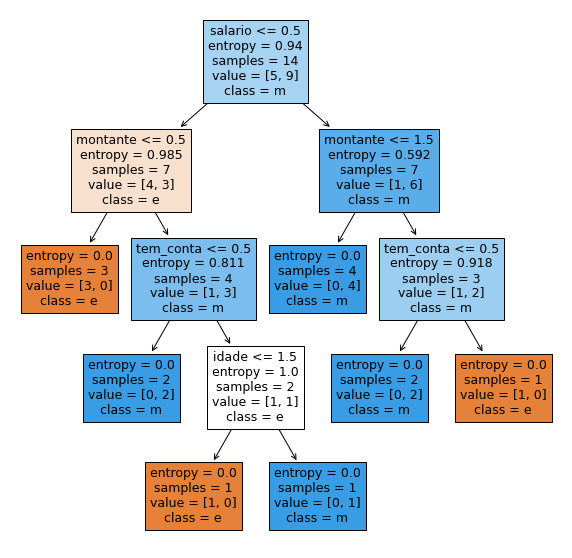

In [ ]:
# mostra a árvore
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig1.savefig("fig1.png")

#### 2️⃣ Abordagem 
Serão separados 70% dos dados do arquivo para treinamento do algoritmo e os outros 30% para a execução do teste.

In [ ]:
# separa as colunas de features (colunas com os dados)
feature_cols = ['montante','idade','salario','tem_conta']
X_train = df[feature_cols]   # Features (conj. dados)

In [ ]:
# separa a coluna target (colunas com os dados das classes)
y_train = df.empresta   # Target variable (conj. dados)

##### 📥 Importando ***train_test_split***

Uso do Modelo para fazer Classificações com os dados de Testes. </br>
Para funcionar, deve ser importada a biblioteca:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separação de dados para Treinamento (train) e Testes (test); Variáveis X são as colunas features e Variáveis Y trata-se da coluna target
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [ ]:
# Visualização dos dados de Treinamento e Testes, já separados
X_train
X_test

,montante,idade,salario,tem_conta
3,2,1,0,0
7,0,1,0,0
6,1,2,1,1
2,1,0,0,0
10,0,1,1,1


In [ ]:
# constrói o modelo usando critério “Entropia”
clf = DecisionTreeClassifier(criterion='entropy')

In [ ]:
# treina o modelo – observe que nessa abordagem está usando os mesmos dados para treinamento e testes (sem separação)
clf = clf.fit(X_train,y_train)

In [ ]:
# mostra modelo processado
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

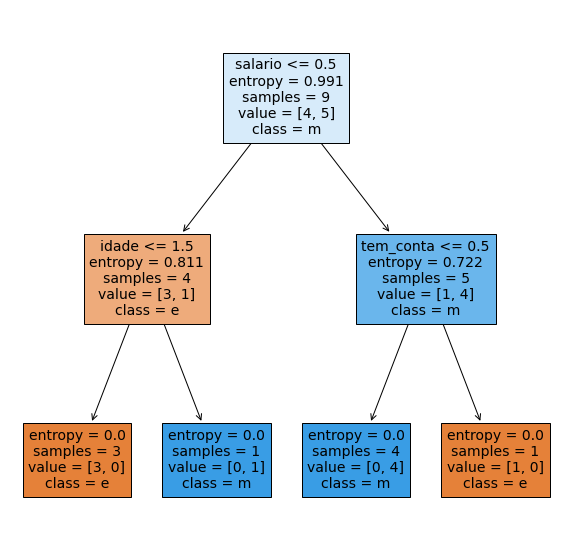

In [ ]:
# mostra a árvore
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, feature_names=X_train.columns,class_names=df.columns[4], filled=True)
fig2.savefig("fig2.png")

In [ ]:
# uso do modelo para fazer predições (classificações) com os dados de testes
y_pred = clf.predict(X_test)

##### 📥 Importando ***metrics***

Para saber como o nosso modelo permofou é necessário importar a seguinte biblioteca:

In [ ]:
from sklearn import metrics

In [ ]:
count_misclassified = (y_test != y_pred).sum()
print('Amostras erroneamente classificadas: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Acuracia: {:.2f}'.format(accuracy))

Amostras erroneamente classificadas: 4
Acuracia: 0.20


##### 📥 Importando ***numpy***

Para testar uma amostra específica é necessário importar a seguinte bibloteca:

In [ ]:
import numpy as np

In [ ]:
# Para a Entrada montante=1 ; idade=0; salario=1; tem_conta=0
# Qual a classe (saída)?
W_test = np.array ([[1, 0, 1, 0]]) 
y_pred = clf.predict(W_test)
y_pred
# Resposta: 1 (Yes) - 

array([1])